### Import Required libraries

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas.io.sql as sqlio

import warnings
warnings.filterwarnings('ignore')

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
pip install seaborn

  Using cached scipy-1.8.0-cp39-cp39-win_amd64.whl (36.9 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## DataBase Connection

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


In [5]:
conn = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")
print("successfully connected to database")

successfully connected to database


## Simple CUBE query

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

***Total_sale_price By Division Wise***

In [6]:
cur = con.cursor()
select_stmt = "SELECT  s.division, t.item_key, SUM(t.total_price) FROM ecom_schema.fact_table t JOIN ecom_schema.store_dim s on s.store_key = t.store_key GROUP BY CUBE(s.division, t.item_key) ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['division', 'item_key', 'total_sales_price'])
df.head(10)

,division,item_key,total_sales_price
0,BARISAL,I00095,24880.0
1,BARISAL,I00173,30096.0
2,BARISAL,I00006,25480.00
3,BARISAL,I00223,22396.5
4,BARISAL,I00043,41472.0
5,BARISAL,I00088,28611.0
6,BARISAL,I00250,29425.5
7,BARISAL,I00110,37462.5
8,BARISAL,I00199,26670.0
9,BARISAL,I00139,35328.0


In [36]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.division, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.division)" \
        "ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [37]:
df = pd.DataFrame(list(records), columns=['Division', 'Total_sales'])
df

,Division,Total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [38]:
df.drop([7],axis=0,inplace=True)

In [35]:
df

,Division,Total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [34]:
df.dtypes

Division       object
Total_sales    object
dtype: object

In [12]:
df['Total_sales'] = df['Total_sales'].astype('float64')

In [13]:
df.dtypes

Division        object
Total_sales    float64
dtype: object

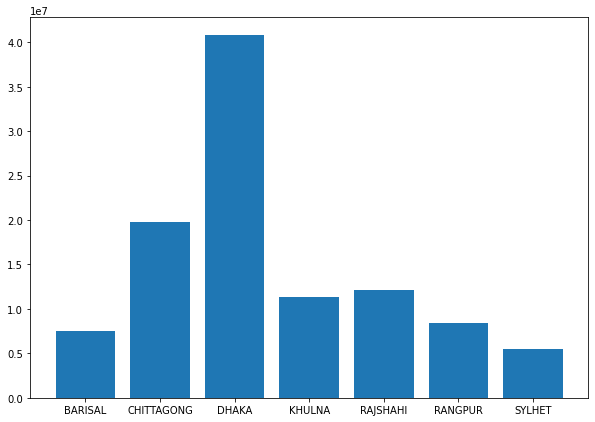

In [14]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df["Division"],df["Total_sales"])
 
# Show Plot
plt.show()

In [15]:
df = df.set_index(['Division'])

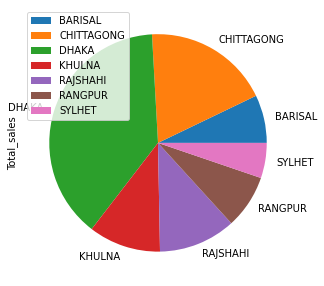

In [16]:
plot = df.plot.pie(y='Total_sales', figsize=(5, 5))

***Total_sale_price By District Wise***

In [6]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.district, t.item_key, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.district, t.item_key)" \
        "ORDER BY s.district ASC"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT', 'I00001', Decimal('2863.5')),
 ('BAGERHAT', 'I00002', Decimal('1559.25')),
 ('BAGERHAT', 'I00003', Decimal('2362.50')),
 ('BAGERHAT', 'I00004', Decimal('2038.50')),
 ('BAGERHAT', 'I00005', Decimal('2058.75')),
 ('BAGERHAT', 'I00006', Decimal('4371.25')),
 ('BAGERHAT', 'I00007', Decimal('1707.75')),
 ('BAGERHAT', 'I00008', Decimal('5248.75')),
 ('BAGERHAT', 'I00009', Decimal('4598.75')),
 ('BAGERHAT', 'I00010', Decimal('2396.25')),
 ('BAGERHAT', 'I00011', Decimal('1626.75')),
 ('BAGERHAT', 'I00012', Decimal('5963.75')),
 ('BAGERHAT', 'I00013', Decimal('1586.25')),
 ('BAGERHAT', 'I00014', Decimal('1991.25')),
 ('BAGERHAT', 'I00015', Decimal('1451.25')),
 ('BAGERHAT', 'I00016', Decimal('4663.75')),
 ('BAGERHAT', 'I00017', Decimal('1640.25')),
 ('BAGERHAT', 'I00018', Decimal('2112.75')),
 ('BAGERHAT', 'I00019', Decimal('1822.50')),
 ('BAGERHAT', 'I00020', Decimal('2004.75')),
 ('BAGERHAT', 'I00021', Decimal('1660.50')),
 ('BAGERHAT', 'I00022', Decimal('2811.25')),
 ('BAGERHAT

In [7]:
df = pd.DataFrame(list(records), columns=['District', 'item_key', 'total_sales_price'])
df.head(10)

,District,item_key,total_sales_price
0,BAGERHAT,I00001,2863.5
1,BAGERHAT,I00002,1559.25
2,BAGERHAT,I00003,2362.50
3,BAGERHAT,I00004,2038.50
4,BAGERHAT,I00005,2058.75
5,BAGERHAT,I00006,4371.25
6,BAGERHAT,I00007,1707.75
7,BAGERHAT,I00008,5248.75
8,BAGERHAT,I00009,4598.75
9,BAGERHAT,I00010,2396.25


***Total_sale_price By year Wise***

In [13]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  year, SUM(total_price) total_sales_price " \
        "FROM ecom_schema.time_dim " \
        "INNER JOIN ecom_schema.fact_table ON fact_table.time_key = time_dim.time_key " \
        "GROUP BY CUBE(time_dim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
records 


successfully connected to database


[(None, Decimal('105401435.75')),
 (Decimal('2021'), Decimal('883772.25')),
 (Decimal('2019'), Decimal('14949510.25')),
 (Decimal('2018'), Decimal('15108197.25')),
 (Decimal('2016'), Decimal('14976508.25')),
 (Decimal('2014'), Decimal('14334731.25')),
 (Decimal('2015'), Decimal('15095720.25')),
 (Decimal('2017'), Decimal('15015806.00')),
 (Decimal('2020'), Decimal('15037190.25'))]

In [14]:
df_year = pd.DataFrame(list(records), columns=['year', 'total_sales_price'])
df_year['total_sales_price'] = df_year['total_sales_price'].astype('int64')
df_year.drop([0],axis=0,inplace=True)
df_year

,year,total_sales_price
1,2021,883772
2,2019,14949510
3,2018,15108197
4,2016,14976508
5,2014,14334731
6,2015,15095720
7,2017,15015806
8,2020,15037190


In [15]:
df_year.dtypes

year                 object
total_sales_price     int64
dtype: object

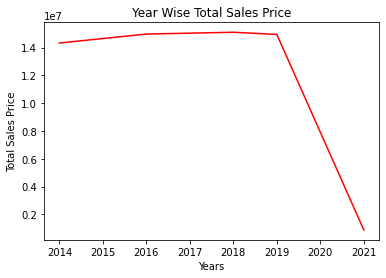

In [26]:
x= df_year['year'][:5]
y = np.array(df_year['total_sales_price'][:5])
plt.plot(x,y, linestyle = 'solid',color = 'r')
plt.title("Year Wise Total Sales Price")
plt.xlabel("Years")
plt.ylabel("Total Sales Price")
plt.show()

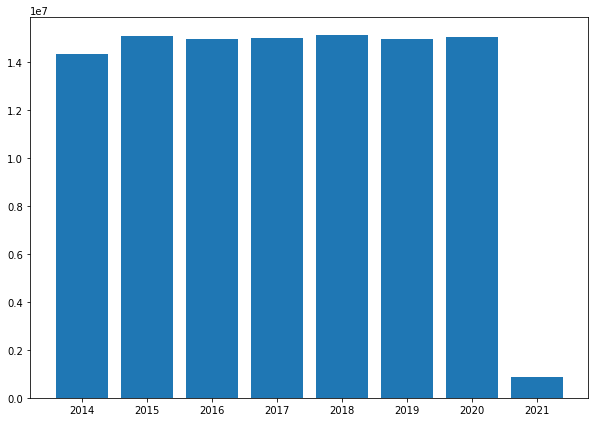

In [29]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df_year["year"],df_year["total_sales_price"])
 
# Show Plot
plt.show()

### Total_sale_price By month Wise

In [39]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  tim.month, SUM(t.total_price) total_sales_price " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim on tim.time_key = t.time_key " \
        "GROUP BY CUBE(tim.month)" \
        "ORDER BY tim.month;"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['months', 'total_sales_price'])
df

successfully connected to database


,months,total_sales_price
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [40]:
df.drop([12],axis=0,inplace=True)

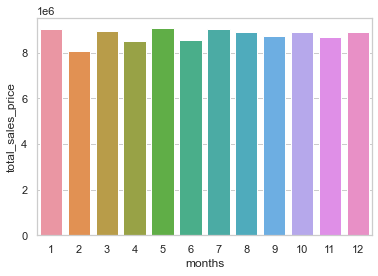

In [47]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="months", y="total_sales_price", data=df)

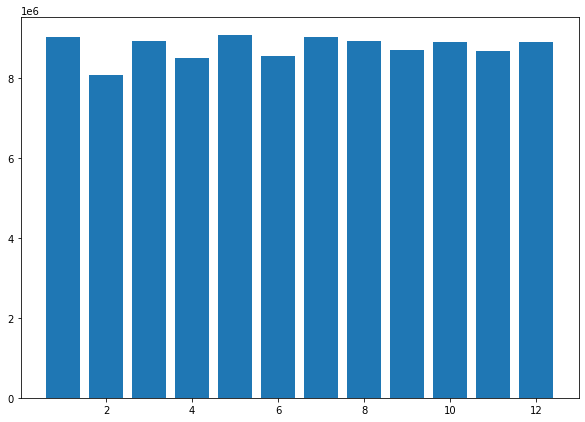

In [41]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df["months"],df["total_sales_price"])
 
# Show Plot
plt.show()

In [42]:
df.dtypes

months               object
total_sales_price    object
dtype: object

In [43]:
df['total_sales_price'] = df['total_sales_price'].astype('float64')

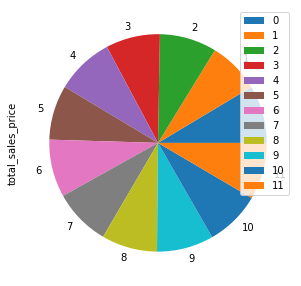

In [44]:
plot = df.plot.pie(y='total_sales_price', figsize=(5, 5))

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [53]:
con = PostgresConnection().getConnection()
cur = con.cursor()

query = "SELECT t.bank_name, sum(f.total_price) " \
        "From ecom_schema.fact_table f " \
        "JOIN ecom_schema.trans_dim t on t.payment_key=f.payment_key " \
        "GROUP BY CUBE (t.bank_name)" \ 
        "ORDER by sum (f.total_price)"
cur.execute(query)
result = cur.fetchall()
result
pd_data = pd.DataFrame(list(result), columns=['Bank', 'Sales'])
pd_data['Sales'] = pd_data['Sales'].astype('float64')
pd_data = pd_data.dropna()
fig = pd_data.plot.barh(x='Bank', y='Sales', figsize=(15,10), rot=0)

SyntaxError: unexpected character after line continuation character (2926739127.py, line 7)

### Q3: Total sales in Barisal

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY CUBE (s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,BARISAL,2897237.75
1,None,2897237.75


### Q4: Total sales in 2015

In [32]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE tim.year = 2015 " \
        "GROUP BY CUBE (tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,2015,15095720.25
1,None,15095720.25


### Q5: Total sales of Barisal in 2015 using ROLLUP

In [52]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE s.district = 'BARISAL' and tim.year = 2015 " \
        "GROUP BY ROLLUP (s.district, tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['year','district', 'total_sales_price'])
df.drop([1,2],axis=0,inplace=True)
df

successfully connected to database


,year,district,total_sales_price
0,2015,BARISAL,415748.75


### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE s.district = 'BARISAL' and tim.year = 2015 " \
        "GROUP BY ROLLUP (s.district, tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(Decimal('2015'), 'BARISAL', Decimal('415748.75')),
 (None, 'BARISAL', Decimal('415748.75')),
 (None, None, Decimal('415748.75'))]

In [36]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, i.item_name, SUM(t.quantity) total_quantity " \
        "From ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key=t.store_key " \
        "JOIN ecom_schema.item_dim i on i.item_key=t.item_key " \
        "GROUP BY CUBE(s.store_key,i.item_name) " 
        
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', '100% Juice Box Variety 6.75 oz ', Decimal('10')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', Decimal('8')),
 ('S0001', 'Advil 2 pill packets', Decimal('28')),
 ('S0001', 'All Purpose Cleaner 409 Spray', Decimal('46')),
 ('S0001', 'Altoids Small Packs Variety', Decimal('13')),
 ('S0001', 'Apple Sauce Variety GoGO Squeeze 3.2oz', Decimal('37')),
 ('S0001', 'AquaFina Purified Drinking Water 16oz', Decimal('39')),
 ('S0001', 'Austin Cookie Cracker Variety', Decimal('10')),
 ('S0001', 'Austin Toasty Crackers w/ PBtr', Decimal('22')),
 ('S0001', 'Baked Chips Variety Mix Frito', Decimal('50')),
 ('S0001', "Barq's Root Beer - 12 oz cans", Decimal('43')),
 ('S0001', 'Belvita Hard Biscuits Blueberry', Decimal('11')),
 ('S0001', 'Belvita Hard Biscuits Cinnamon', Decimal('24')),
 ('S0001', 'Belvita Protein Oats Soft Biscuit', Decimal('50')),
 ('S0001', 'Blue Diamond Almonds Rstd, Sltd', Decimal('13')),
 ('S0001', 'Bounty Paper

In [39]:
df = pd.DataFrame(list(records), columns=['store_key', 'item_name','total_quantity'])
df.head(10)

,store_key,item_name,total_quantity
0,S0001,100% Juice Box Variety 6.75 oz,10
1,S0001,A&W Root Beer - 12 oz cans,60
2,S0001,A&W Root Beer Diet - 12 oz cans,8
3,S0001,Advil 2 pill packets,28
4,S0001,All Purpose Cleaner 409 Spray,46
5,S0001,Altoids Small Packs Variety,13
6,S0001,Apple Sauce Variety GoGO Squeeze 3.2oz,37
7,S0001,AquaFina Purified Drinking Water 16oz,39
8,S0001,Austin Cookie Cracker Variety,10
9,S0001,Austin Toasty Crackers w/ PBtr,22


In [40]:
df.total_quantity.max()

Decimal('6000185')

In [42]:
grouped = df.groupby(['store_key','item_name']).agg({'total_quantity' : ['max']})
grouped

total_quantity
                                                           max
store_key item_name                                           
S0001     100% Juice Box Variety 6.75 oz                    10
          A&W Root Beer - 12 oz cans                        60
          A&W Root Beer Diet - 12 oz cans                    8
          Advil 2 pill packets                              28
          All Purpose Cleaner 409 Spray                     46
...                                                        ...
S0099     Welch's 100% Juice Variety10 oz                   45
          Wint O Green LifeSavers Sugar Free                47
          Wonderful Pistachios (in shell)                   22
          Yoplait Original Yogurt Variety Pack              29
          Zoo Animal Cookies/Crackers                       45

[187114 rows x 1 columns]

In [43]:
grouped.reset_index()

,store_key,item_name,total_quantity
,,,max
0,S0001,100% Juice Box Variety 6.75 oz,10
1,S0001,A&W Root Beer - 12 oz cans,60
2,S0001,A&W Root Beer Diet - 12 oz cans,8
3,S0001,Advil 2 pill packets,28
4,S0001,All Purpose Cleaner 409 Spray,46
...,...,...,...
187109,S0099,Welch's 100% Juice Variety10 oz,45
187110,S0099,Wint O Green LifeSavers Sugar Free,47
187111,S0099,Wonderful Pistachios (in shell),22


### What season(quarter) is the worst for each product item? 

In [44]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH grouped_sales AS (SELECT quarter, item_key, SUM(quantity) AS total_quantity FROM ecom_schema.fact_table f join ecom_schema.Time_dim t ON t.time_key = f.time_key GROUP BY item_key,quarter) SELECT CONCAT(s.item_key, '->',s.quarter, '(',total_quantity,')') FROM grouped_sales s JOIN (SELECT item_key, min(total_quantity) AS minq FROM grouped_sales s GROUP BY item_key) ss ON ss.item_key = s.item_key and s.total_quantity = ss.minq " 
        
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('I00001->Q2(5735)',),
 ('I00002->Q4(5589)',),
 ('I00003->Q3(5606)',),
 ('I00004->Q4(5521)',),
 ('I00005->Q2(5286)',),
 ('I00006->Q2(5405)',),
 ('I00007->Q2(5329)',),
 ('I00008->Q1(5545)',),
 ('I00009->Q4(5524)',),
 ('I00010->Q4(5309)',),
 ('I00011->Q1(5463)',),
 ('I00012->Q1(5528)',),
 ('I00013->Q2(5385)',),
 ('I00014->Q3(5559)',),
 ('I00015->Q4(5929)',),
 ('I00016->Q4(5445)',),
 ('I00017->Q1(5611)',),
 ('I00018->Q1(5602)',),
 ('I00019->Q4(5424)',),
 ('I00020->Q2(5489)',),
 ('I00021->Q4(5425)',),
 ('I00022->Q1(5254)',),
 ('I00023->Q2(5869)',),
 ('I00024->Q4(5480)',),
 ('I00025->Q1(5279)',),
 ('I00026->Q2(5428)',),
 ('I00027->Q1(5351)',),
 ('I00028->Q4(5402)',),
 ('I00029->Q2(5379)',),
 ('I00030->Q3(5255)',),
 ('I00031->Q4(5569)',),
 ('I00032->Q2(5503)',),
 ('I00033->Q1(5604)',),
 ('I00034->Q3(5645)',),
 ('I00035->Q4(5120)',),
 ('I00036->Q4(5222)',),
 ('I00037->Q2(5396)',),
 ('I00038->Q2(5457)',),
 ('I00039->Q1(5472)',),
 ('I00040->Q1(5264)',),
 ('I00041->Q4(5523)',),
 ('I00042->Q1(52

In [47]:
df = pd.DataFrame(list(records), columns=['worst season for each item'])
df.head(10)

,worst season for each item
0,I00001->Q2(5735)
1,I00002->Q4(5589)
2,I00003->Q3(5606)
3,I00004->Q4(5521)
4,I00005->Q2(5286)
5,I00006->Q2(5405)
6,I00007->Q2(5329)
7,I00008->Q1(5545)
8,I00009->Q4(5524)
9,I00010->Q4(5309)
